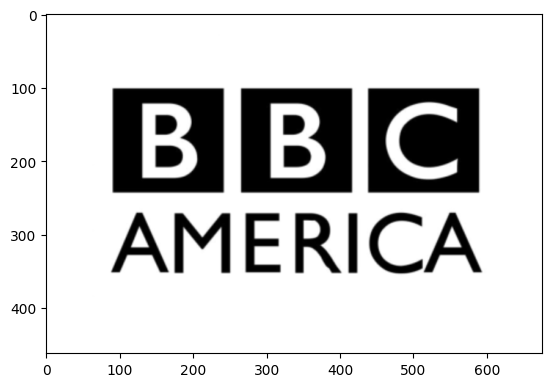

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("bbc.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

In [8]:
Ix = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0)
Iy = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1)

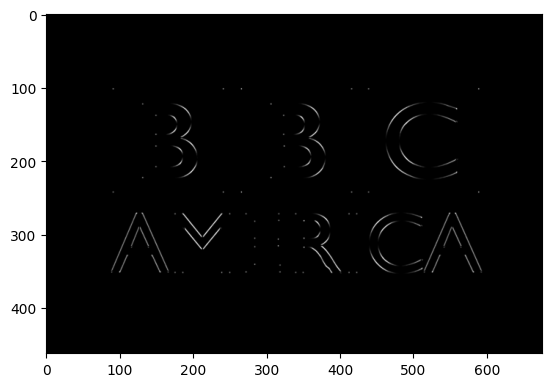

In [9]:
plt.imshow(Ix**2 * Iy**2, cmap='gray')

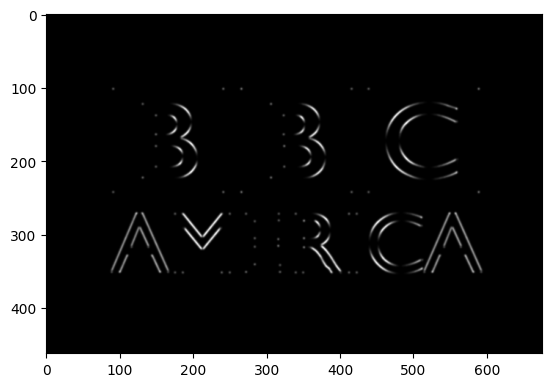

In [10]:
corners_suppressed = cv2.GaussianBlur(Ix**2 * Iy**2, ksize=(0, 0), sigmaX=1)
plt.imshow(corners_suppressed, cmap='gray')

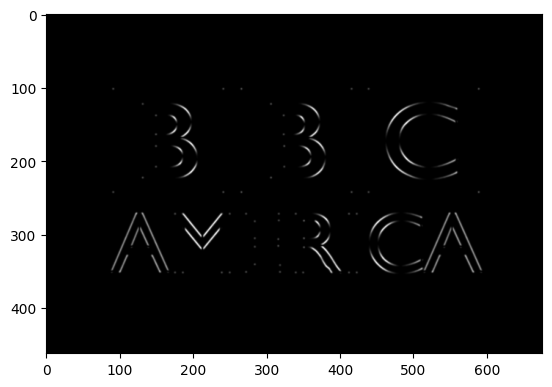

In [11]:
corners_suppressed = cv2.GaussianBlur(Ix* Iy, ksize=(0, 0), sigmaX=1) ** 2
plt.imshow(corners_suppressed, cmap='gray')

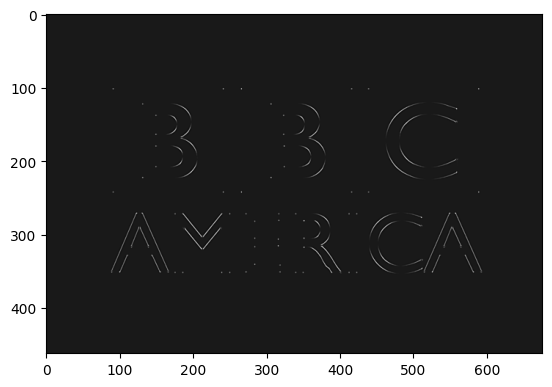

In [12]:
plt.imshow(Ix**2 * Iy**2 - corners_suppressed, cmap='gray')

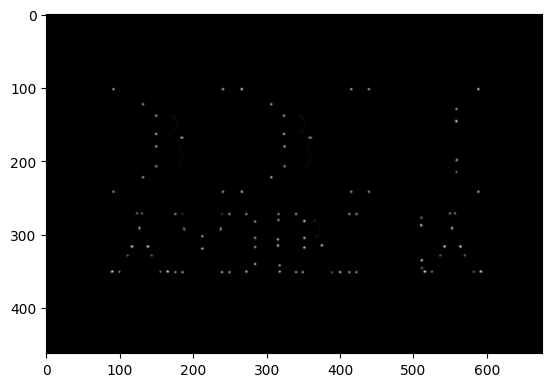

In [13]:
Ix_squared = cv2.GaussianBlur(Ix**2, ksize=(0, 0), sigmaX=1)
Iy_squared = cv2.GaussianBlur(Iy**2, ksize=(0, 0), sigmaX=1)

corners = Ix_squared * Iy_squared - corners_suppressed
plt.imshow(corners, cmap='gray')

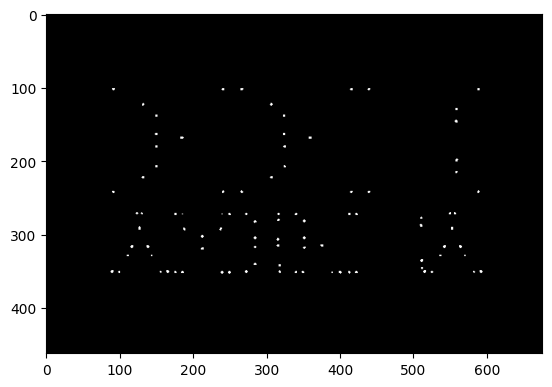

In [14]:
corners[corners < corners.max() / 5] = 0
corners[corners != 0] = 255

plt.imshow(corners, cmap="gray")

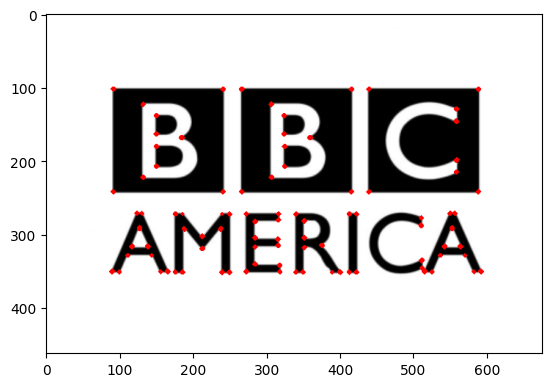

In [15]:
new_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if corners[i][j] == 255:
            cv2.circle(new_img, (j, i), radius=2, color=(255, 0, 0), thickness=-1)

plt.imshow(new_img, cmap="gray")
plt.show()